# Лабораторная работа №1
**Вариант №21**

## Здача №1.1
### Постановка задач
Найти значения машинного нуля, машинной бесконечности и машинного
эпсилон.

### Решение

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
c = 2.0
while np.isfinite(2*c):
    c *= 2
print(f"Машинная бесконечность: {c:.3e}")

Машинная бесконечность: 8.988e+307


In [3]:
x = 1.0

while x/2 > 0:
    x /=2
print(f"Машинный ноль: {x}")

Машинный ноль: 5e-324


In [4]:
eps = 1.0
while 1 + eps / 2 != 1:
    eps /= 2
print(f"Машинный эпсилон: {eps}")

Машинный эпсилон: 2.220446049250313e-16


## Задача №1.2

### Постановка задачи
Исследовать поведение погрешности приближения функции $F(x)$ частичными суммами  на отрезке  $[a,b]$.

$F(x) = x\cos(x),\ x\in[1, 4]$


### Решение
1. Используя разложения стандартных функций в ряд Тейлора в окрестности нуля, получим
разложение функции

$F(x) = \sum\limits_{n=1}^{\infty} \dfrac{(-1)^{n+1}(2n + 1)}{n!}
x^{2n - 1}.$

2. Составим процедуру, вычисляющую частную сумму $N$ членов ряда $S(x,N).$

In [5]:
def F(x):
    return x * np.cos(x)

def decompose(x):
    '''
    Итератор последовательно возвращает члены
    разложения функции F(x) в ряд Тейлора.
    '''
    fact = 1.0
    i = 1
    while True:
        k = (-1)**(i+1) * (2*i - 1)
        yield k * x ** (2*i - 1) / fact
        fact *= (2*i) * (2*i + 1)
        i += 1

def S(x, N):
    '''
    N-ая частичная сумма ряда Тейлора
    для функции F(x). 
    '''
    res = 0.0
    decomposition = decompose(x)
    for i in range(N):
        e = next(decomposition)
        res += e
    return res

In [69]:
a = 1
b = 4
N = 5
x = np.linspace(a, b, 1001, endpoint=True)
y_F = F(x)
y = [S(x, i) for i in range(0, N + 1)]


3. Построим графики исходной функции и первых пяти частичных сумм: $S(x, 1),\dots,S(x,5)$.

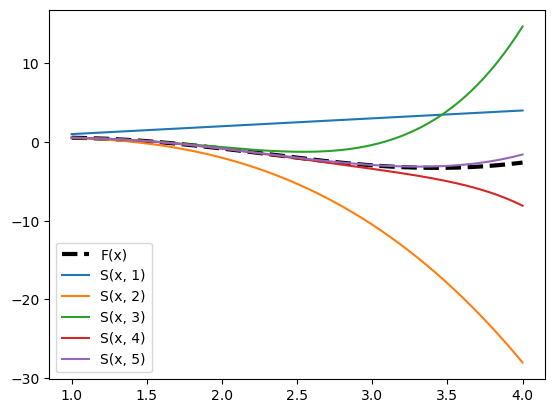

In [70]:
plt.plot(x, y_F, "k--", linewidth=3, label="F(x)")
for i in range(1, N + 1):
    plt.plot(x, y[i], label=f"S(x, {i})")

plt.legend()

4. Составим функции, вычисляющие абсолютную погрешность и относительную погрешность первых пяти частичных сумм. Построим графики.

Text(0.5, 1.0, 'Абсолютные погрешности частичных сумм')

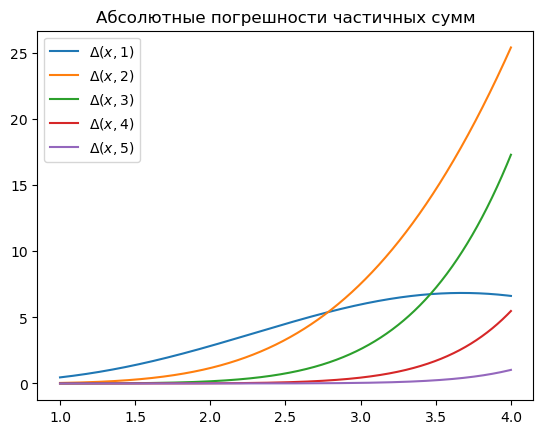

In [71]:
Dt = [abs(y[i] - y_F) for i in range(0, N + 1)]
for i in range(1, N + 1):
    plt.plot(x, Dt[i], label=f"$\Delta(x,{i})$")
plt.legend()
plt.title('Абсолютные погрешности частичных сумм')

Text(0.5, 1.0, 'Относительные погрешности частичных сумм')

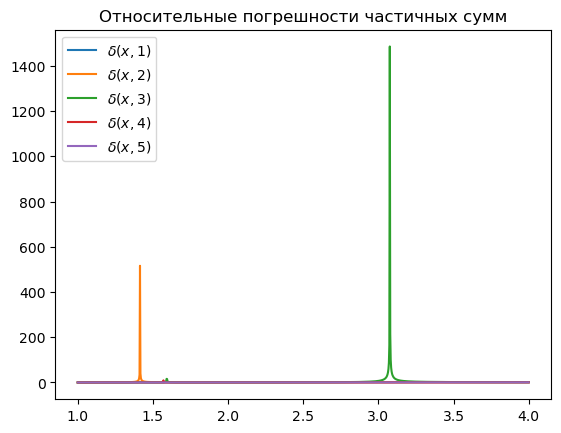

In [72]:
dt = [Dt[i] / abs(y[i]) for i in range(1, N + 1)]
dt.insert(0, 0)
for i in range(1, N + 1):
    plt.plot(x, dt[i], label=f"$\delta(x,{i})$")
plt.legend(loc=2)
plt.title('Относительные погрешности частичных сумм')

5. Определим количество членов ряда N, при котором величина относительной погрешности в средней точке отрезка станет меньше машинного эпсилон.

In [73]:
center = (a + b) / 2
decomposition = decompose(center)
n = 1
s = next(decomposition)
nxt = next(decomposition)
while abs(nxt / s) >= eps:
    s += nxt
    nxt = next(decomposition)
    n += 1
print('N =', n)

N = 13


6. При найденном значении $N$ построим графики абсолютной и отностительной погрешностей.

Text(0.5, 1.0, 'Абсолютная погрешность 13-ой частичной суммы')

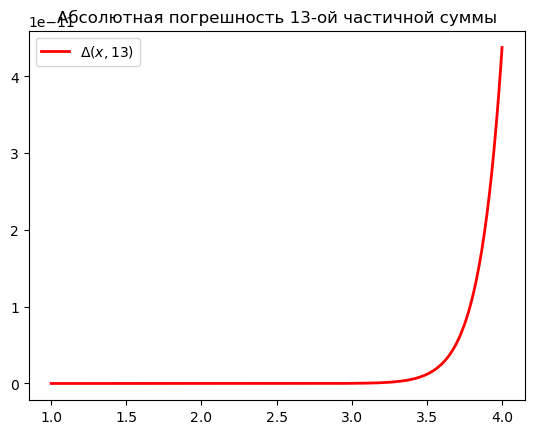

In [74]:
y_strong = S(x, n)
Dt_strong = abs(y_strong - y_F)
plt.plot(x, Dt_strong, 'r', linewidth=2, label=f'$\Delta(x, {n})$')
# plt.plot(x, y_strong, 'g')
plt.legend()
plt.title(f'Абсолютная погрешность {n}-ой частичной суммы')

Text(0.5, 1.0, 'Отностительная погрешность 13-ой частичной суммы')

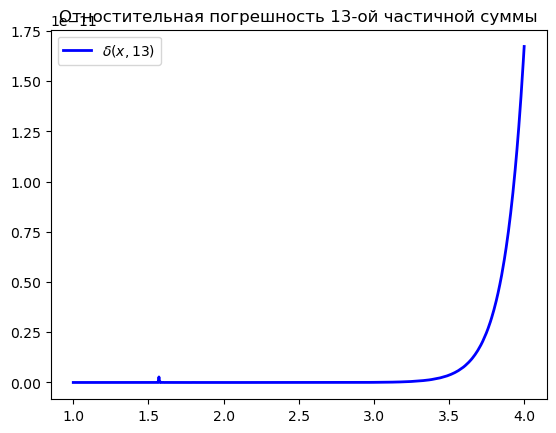

In [75]:
dt_strong = Dt_strong / abs(y_strong)
plt.plot(x, dt_strong, 'b', linewidth=2, label=f'$\delta(x, {n})$')
plt.legend()
plt.title(f'Отностительная погрешность {n}-ой частичной суммы')

7. Составим программу округления вычислений результата до $t$ разрядов мантиссы и произвести расчеты п.4 с учетом округления.

In [79]:
def round_mant(x, t):
    return np.float32(np.format_float_scientific(x, precision = t - 1, trim = '0'))

def round_arr(x, t):
    if type(x) != np.ndarray:
        return round_mant(x, 1)
    y = x.copy()
    for i in range(len(x)):
        y[i] = round_mant(x[i], t)
    return x

Text(0.5, 1.0, 'Абсолютные погрешности частичных сумм (округленных)')

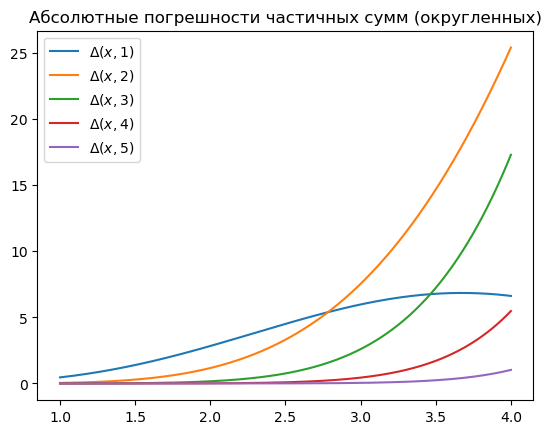

In [80]:
Rnd = [round_arr(y[i], 1) for i in range(1, N+1)]
Rnd.insert(0, 0)

Dtr = [abs(Rnd[i] - y_F) for i in range(1, N + 1)]
Dtr.insert(0, 0)
for i in range(1, N + 1):
    plt.plot(x, Dtr[i], label=f"$\Delta(x,{i})$")
plt.legend()
plt.title('Абсолютные погрешности частичных сумм (округленных)')

Text(0.5, 1.0, 'Относительные погрешности частичных сумм (округленных)')

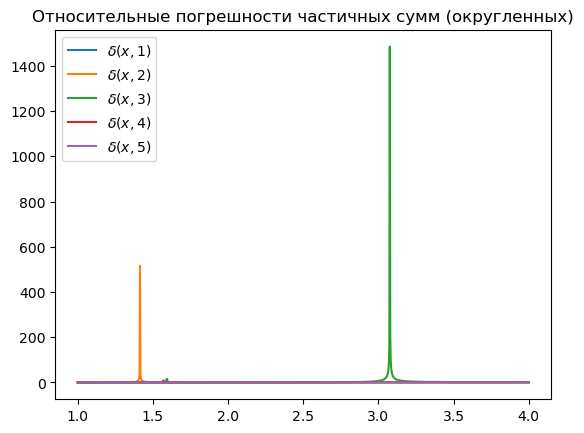

In [81]:
dtr = [Dtr[i] / abs(Rnd[i]) for i in range(1, N + 1)]
dtr.insert(0, 0)
for i in range(1, N + 1):
    plt.plot(x, dtr[i], label=f"$\delta(x,{i})$")
plt.legend(loc=2)
plt.title('Относительные погрешности частичных сумм (округленных)')

## Задача №1.3
### Постановка задачи
Дана функция $f(a, b, c) = \dfrac{10ab}{a^2 + c},\ a=12.315,\ b=0.0352,\ c=10.82$. Значения переменных указаны со всеми верными цифрами. Оценить погрешность результата функции. Результат представить в двух формах записи: с явным указанием погрешностей и с учетом количества верных цифр. 

### Решение 1
(С использованием оценок  погрешности для арифметических операций)

Определим абсолютные и относительные погрешности входных данных:
$\Delta a = 0.001,\ \Delta b = 0.0001,\ \Delta c = 0.01,$

$\delta a = \dfrac{\Delta a}{a}= 0.00008120178643930167,$

$\delta b = \dfrac{\Delta b}{b} = 0.002840909090909091,$

$\delta c = \dfrac{\Delta c}{c} = 0.0009242144177449168.$

<!-- Т.к. относительные погрешности сильно меньше единицы для оценки погрешностей произведения и частного используем приближенные равенства:
 -->

Определим относительную и абсолютную погрешности результата, используя оценки погрешности для арифметических операций:

$\delta(\dfrac{10 ab}{a^2 + c}) = \delta(10ab) + \delta(a^2 + c) = \delta a + \delta b + 2\delta a + \delta c = 3\delta a + \delta b + \delta c,$

$\delta f(a,b,c) = 0.004008728867971913,$

$f(a, b, c) = 0.026679595499055343,$

$\Delta f(a, b, c) = \delta f \cdot f = 0.00010695126466287666.$

Результат с явным указанием погрешности:
$f(12.315, 0.0352, 10.82) = 0.02668 \pm 0.00011.$

Результат с учетом количества верных цифр:
$f(12.315, 0.0352, 10.82) = 0.0267.$

### Решение 2
(С использованием общей формулы погрешностей)

Общая формула прогрешности для функции $f$ имеет вид:

$\Delta f(a, b, c) =
\left|\dfrac{\partial f}{\partial a}(a, b, c)\right| \Delta a +
\left|\dfrac{\partial f}{\partial b}(a, b, c)\right| \Delta b +
\left|\dfrac{\partial f}{\partial c}(a, b, c)\right| \Delta c.$

Вычислим частные производные функции $f$:

$ \dfrac{\partial f}{\partial a}(a, b, c) =
\dfrac{10b(a^2 + c) - 20a^2b}{(a^2 + c)^2},$

$\dfrac{\partial f}{\partial b}(a, b, c) =
\dfrac{10a}{a^2 + c},$

$\dfrac{\partial f}{\partial c}(a, b, c) =
-\dfrac{10ab}{(a^2 + c)^2},$

$ \dfrac{\partial f}{\partial a}(a, b, c) =
-0.0018778920021420157,$

$\dfrac{\partial f}{\partial b}(a, b, c)  =
0.7579430539504358,$

$\dfrac{\partial f}{\partial c}(a, b, c)  = 
-0.0001642031188852319,$

$\Delta f(a,b,c) = 0.00007931422858603792.$

Результат с явным указанием погрешности:
$f(12.315, 0.0352, 10.82) = 0.02668 \pm 0.00008.$

Результат с учетом количества верных цифр:
$f(12.315, 0.0352, 10.82) = 0.0267.$

### Вывод
Расчет погрешности с помощью общей формулы дает лучшую точность в сравнении с оценками для арифметических операций.